In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from utils import show_images, draw_lines

蓝色是点，绿色是线 返回结果中同样是纵坐标在前，横坐标在后


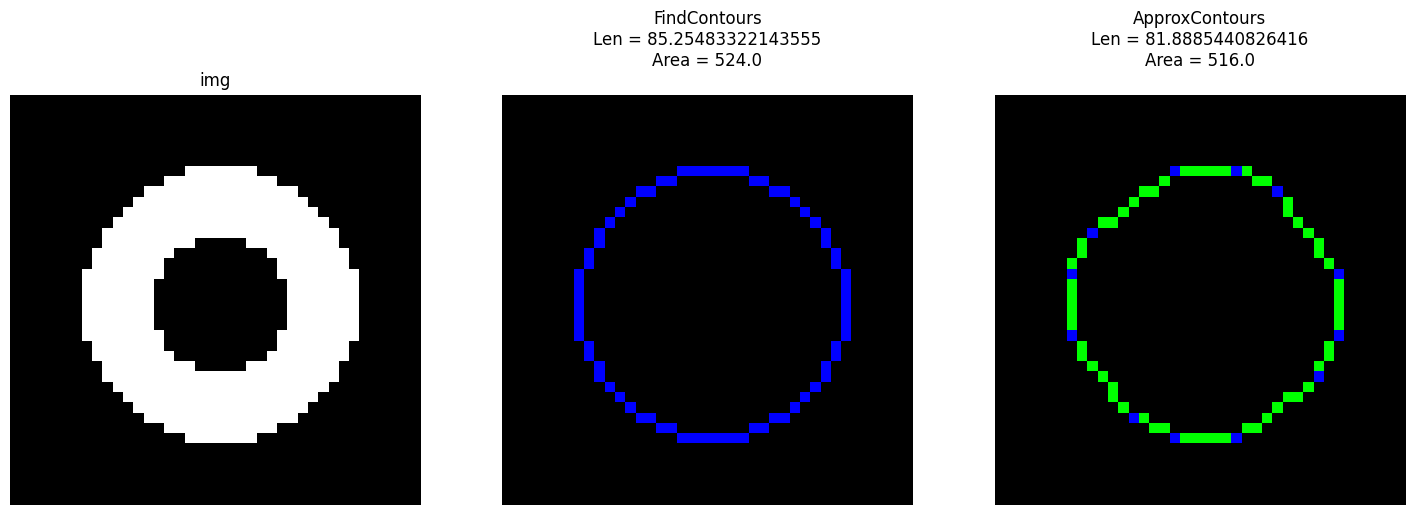

轮廓是否是凸 True
[10, 15] 是否在轮廓中 1.0
[15, 10] 是否在轮廓中 1.0


In [2]:
'''
approxPolyDP 和 轮廓的一些函数(周长、面积等)
'''
results = []
img = np.zeros((40, 40), dtype=np.uint8)
cv2.circle(img, (20, 20), 10, 255, 5)
results.append(['img', img])

contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
point_set = contours[0][:, 0]

now_img = cv2.cvtColor(np.zeros_like(img), cv2.COLOR_GRAY2BGR)

print('蓝色是点，绿色是线', '返回结果中同样是纵坐标在前，横坐标在后')
info = 'FindContours\n'
info += f'Len = {cv2.arcLength(point_set, closed=True)}\n'
info += f'Area = {cv2.contourArea(point_set)}\n'
results.append([info, draw_lines(now_img, point_set)])

approx_points = cv2.approxPolyDP(point_set, 1, True)[:, 0]
info = 'ApproxContours\n'
info += f'Len = {cv2.arcLength(approx_points, closed=True)}\n'
info += f'Area = {cv2.contourArea(approx_points)}\n'
results.append([info, draw_lines(now_img, approx_points)])

show_images(results)

print('轮廓是否是凸', cv2.isContourConvex(approx_points))

now_points = [[10, 15], [15, 10]]
for onep in now_points:
    now_img[onep[0], onep[1]] = [255, 255, 255]
    # measureDist: False 只返回 -1,0,+1；True 则返回到轮廓的最近距离
    print(f'{onep} 是否在轮廓中', cv2.pointPolygonTest(approx_points, onep, measureDist=False))


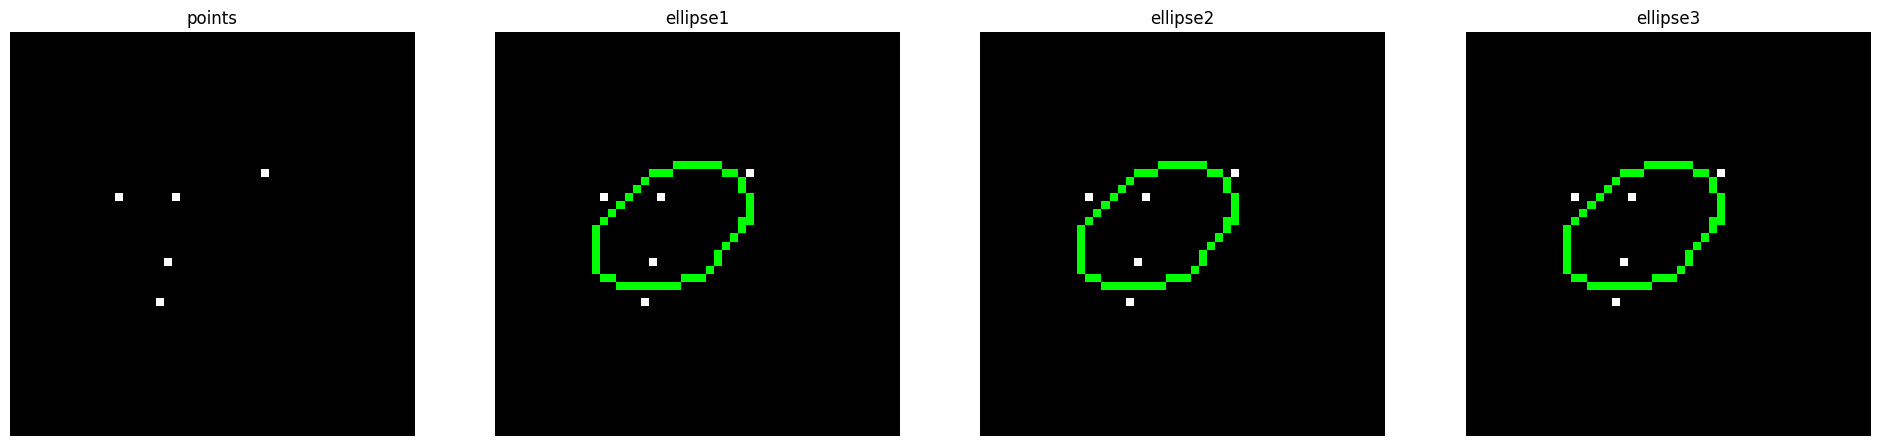

In [3]:
'''
点集各种 Fit 函数
'''
results = []

img = np.zeros((50, 50), dtype=np.uint8)
point_set = np.array([[20, 20], [20, 13], [28, 19], [33, 18], [17, 31]])
for onep in point_set:
    img[onep[0], onep[1]] = 255
results.append(['points', np.copy(img)])

# important: 点集需要纵坐标在前面！！！
point_set[:, [0, 1]] = point_set[:, [1, 0]]

# # 最小矩形（正方向）
# now_img = cv2.cvtColor(np.copy(img), cv2.COLOR_GRAY2BGR)
# x0,y0,w0,h0 = cv2.boundingRect(point_set)
# cv2.rectangle(now_img, (x0,y0), (x0+w0,y0+h0), [0,255,0])
# show_image(now_img)

# # 最小矩形（任意方向）
# now_img = cv2.cvtColor(np.copy(img), cv2.COLOR_GRAY2BGR)
# box = cv2.boxPoints(cv2.minAreaRect(point_set))
# box = box.astype(int) # 这句很重要，坐标转为 int
# cv2.drawContours(now_img, [box], -1, (0, 255, 0), 1)
# show_image(now_img)

# # 最小凸包
# now_img = cv2.cvtColor(np.copy(img), cv2.COLOR_GRAY2BGR)
# hull = cv2.convexHull(point_set)
# hull = hull.astype(int) # 这句很重要，坐标转为 int
# cv2.drawContours(now_img, [hull], -1, (0, 255, 0), 1)
# show_image(now_img)

# # 最小三角形
# now_img = cv2.cvtColor(np.copy(img), cv2.COLOR_GRAY2BGR)
# area, triangle  = cv2.minEnclosingTriangle(point_set)
# triangle = triangle.astype(int)
# cv2.drawContours(now_img, [triangle], -1, (0, 255, 0), 1)
# show_image(now_img)

# 最小椭圆
now_img = cv2.cvtColor(np.copy(img), cv2.COLOR_GRAY2BGR)
ellipse = cv2.fitEllipse(point_set)
cv2.ellipse(now_img, ellipse, (0,255,0), 1)
results.append(['ellipse1', np.copy(now_img)])

# 最小椭圆
now_img = cv2.cvtColor(np.copy(img), cv2.COLOR_GRAY2BGR)
ellipse = cv2.fitEllipseAMS(point_set)
cv2.ellipse(now_img, ellipse, (0,255,0), 1)
results.append(['ellipse2', np.copy(now_img)])

# 最小椭圆
now_img = cv2.cvtColor(np.copy(img), cv2.COLOR_GRAY2BGR)
ellipse = cv2.fitEllipseDirect(point_set)
cv2.ellipse(now_img, ellipse, (0,255,0), 1)
results.append(['ellipse3', np.copy(now_img)])

show_images(results)


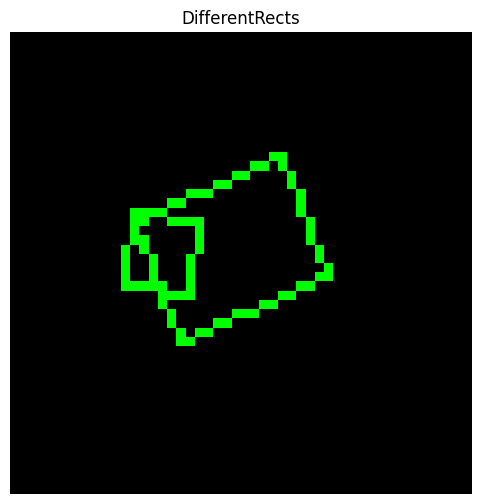

In [4]:
'''
相交
'''
now_img = cv2.cvtColor(np.copy(img), cv2.COLOR_GRAY2BGR)
rect1 = cv2.minAreaRect(point_set[0:3])
rect2 = cv2.minAreaRect(point_set[1:5])
cv2.drawContours(now_img, [cv2.boxPoints(rect1).astype(int)], -1, (0, 255, 0), 1)
cv2.drawContours(now_img, [cv2.boxPoints(rect2).astype(int)], -1, (0, 255, 0), 1)
show_images([('DifferentRects', now_img)])

# 直接使用矩形相交方法
is_intersect, intersect_points1 = cv2.rotatedRectangleIntersection(rect1, rect2)

# 求矩形的点，然后使用轮廓相交方法
points1 = cv2.RotatedRect(*rect1).points()
points2 = cv2.RotatedRect(*rect2).points()
area, intersect_points2 = cv2.intersectConvexConvex(points1, points2)